#0. House Prices

- https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

## 데이터 로드

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
import os
train = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/house/train.csv", index_col="Id")
test = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/house/test.csv", index_col="Id")

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
print(train.shape)
train.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
print(test.shape)
test.head()

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
sub = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/house/sample_submission.csv", index_col="Id")
print(sub.shape)
sub.head()

(1459, 1)


,SalePrice
Id,
1461,169277.052498
1462,187758.393989
1463,183583.683570
1464,179317.477511
1465,150730.079977


#1. EDA

In [9]:
# info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [11]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [112]:
train.select_dtypes(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


## histplot

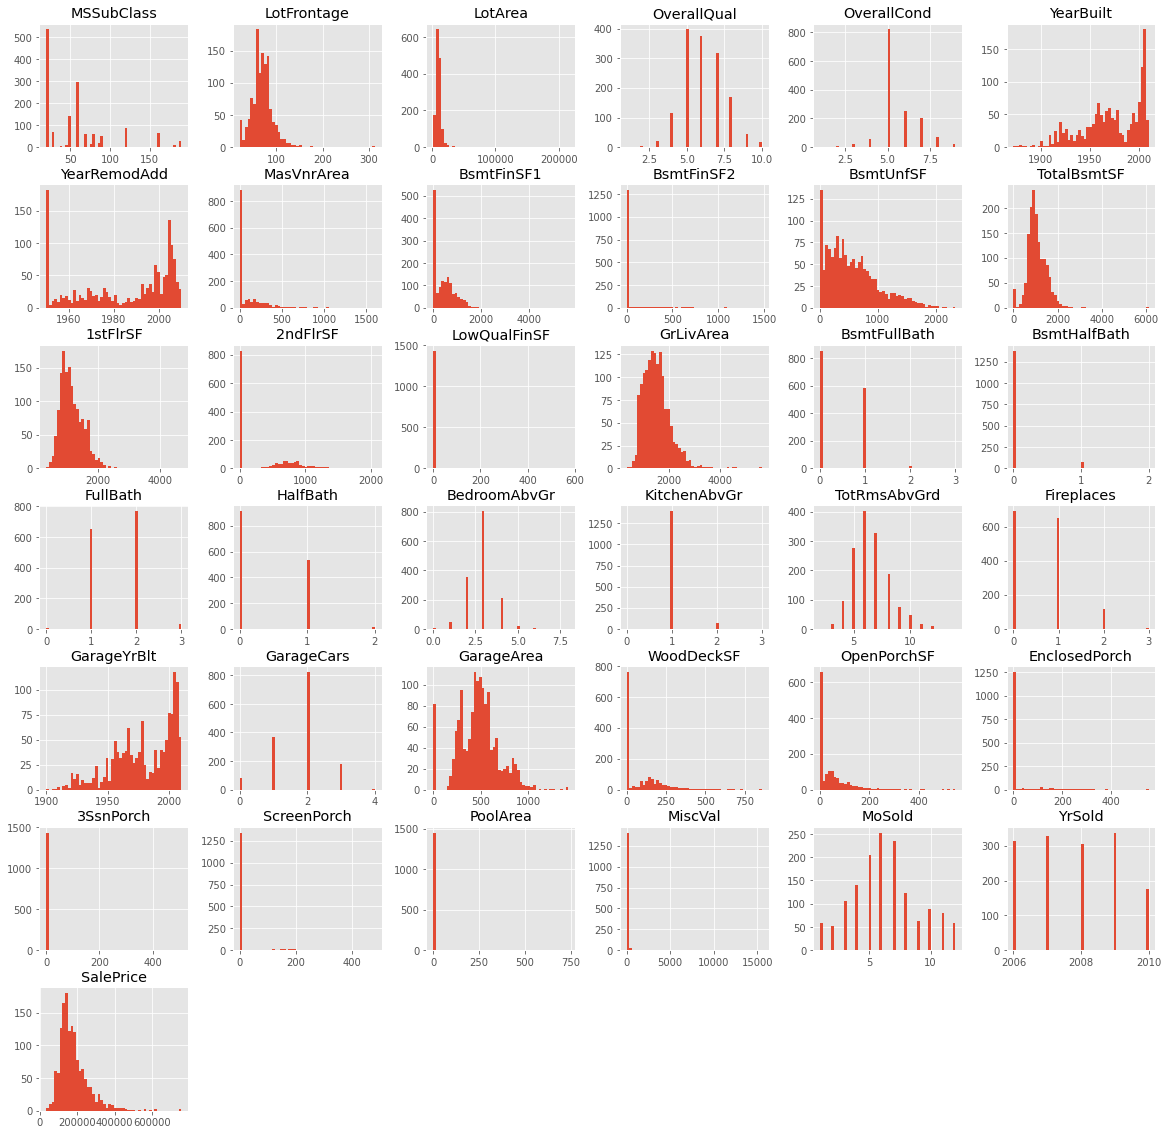

In [12]:
# 수치 데이터의 분포 확인, 첨도를 통해 너무 뾰족하지 않은지 => 한쪽에 데이터가 몰려있는지 확인
# 왜도 => 너무 한쪽에 치우쳐져 있지 않은지 확인
# 정규분포 형태인지 확인
# 막대가 떨어져 있다면 수치 데이터가 아니라 범주형 데이터가 아닌지 확인
train.hist(figsize=(20, 20), bins=50);

## 결측치 탐색

In [13]:
train_null = train.isnull().sum()
train_sum = train_null[train_null > 0].sort_values(ascending=False)
train_sum

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [14]:
test_null = test.isnull().sum()
test_na_sum = test_null[test_null > 0].sort_values(ascending=False)
test_na_sum

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

## 이상치 탐색

In [15]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

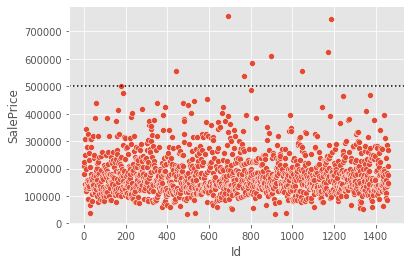

In [16]:
sns.scatterplot(data=train, x=train.index, y="SalePrice")
plt.axhline(500000, c="k", ls=":")

## 희소값 탐색

In [17]:
train.select_dtypes(include="object").nunique().nlargest(10)

Neighborhood    25
Exterior2nd     16
Exterior1st     15
Condition1       9
SaleType         9
Condition2       8
HouseStyle       8
RoofMatl         8
Functional       7
RoofStyle        6
dtype: int64

In [18]:
ncount = train["Neighborhood"].value_counts()
ncount

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

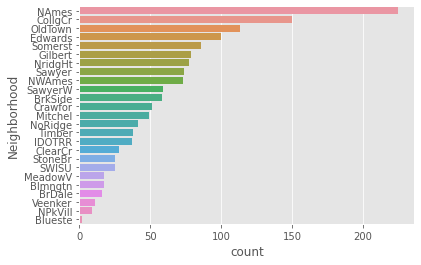

In [19]:
sns.countplot(data=train, y="Neighborhood", order=ncount.index)

## 상관계수

In [107]:
corr = train.corr()

In [108]:
corr.loc[abs(corr["SalePrice"]) > 0.6, "SalePrice"]

OverallQual           0.790982
TotalBsmtSF           0.613581
1stFlrSF              0.605852
GrLivArea             0.708624
GarageCars            0.640409
GarageArea            0.623431
SalePrice             1.000000
SalePrice_ss          1.000000
SalePrice_mm          1.000000
SalePrice_rs          1.000000
SalePrice_log1p       0.948374
SalePrice_ss_log1p    0.822610
SalePrice_log1p_ss    0.948374
TotalSF               0.782260
Name: SalePrice, dtype: float64

In [109]:
corr.loc[abs(corr["SalePrice"]) > 0.6, "SalePrice"].index

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice', 'SalePrice_ss', 'SalePrice_mm',
       'SalePrice_rs', 'SalePrice_log1p', 'SalePrice_ss_log1p',
       'SalePrice_log1p_ss', 'TotalSF'],
      dtype='object')

#2. 변수 스케일링

- scaler, 왜도와 첨도, 이산화, 인코딩

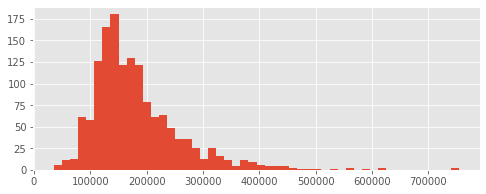

In [20]:
train["SalePrice"].hist(bins=50, figsize=(8, 3));

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [72]:
ss = StandardScaler()
ss

StandardScaler()

In [78]:
train[["SalePrice_ss"]] = ss.fit(train[["SalePrice"]]).transform(train[["SalePrice"]])

In [75]:
mm = MinMaxScaler()
train[["SalePrice_mm"]] = mm.fit_transform(train[["SalePrice"]])

In [76]:
rs = RobustScaler()
train[["SalePrice_rs"]] = rs.fit_transform(train[["SalePrice"]])

In [79]:
train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]]

,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs
Id,,,,
1,208500,0.347273,0.241078,0.541506
2,181500,0.007288,0.203583,0.220173
3,223500,0.536154,0.261908,0.720024
4,140000,-0.515281,0.145952,-0.273728
5,250000,0.869843,0.298709,1.035406
...,...,...,...,...
1456,175000,-0.074560,0.194556,0.142815
1457,210000,0.366161,0.243161,0.559357
1458,266500,1.077611,0.321622,1.231776


In [80]:
train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]].describe()

,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs
count,1460.000000,1.460000e+03,1460.000000,1460.000000
mean,180921.195890,1.362685e-16,0.202779,0.213284
std,79442.502883,1.000343e+00,0.110321,0.945463
min,34900.000000,-1.838704e+00,0.000000,-1.524546
25%,129975.000000,-6.415162e-01,0.132030,-0.393038
50%,163000.000000,-2.256643e-01,0.177892,0.000000
75%,214000.000000,4.165294e-01,0.248715,0.606962
max,755000.000000,7.228819e+00,1.000000,7.045522


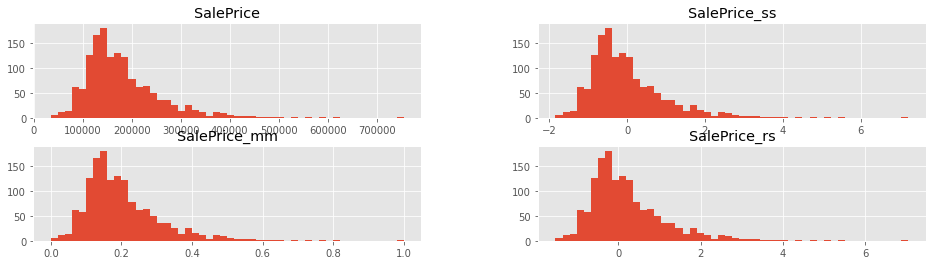

In [81]:
# histplot - "SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"
# x 축의 값은 다 다르지만 분포는 동일한 것을 확인할 수 있습니다.
train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]].hist(bins=50, figsize=(16, 4));

## 로그

In [110]:
print("왜도(Skewness):", train["SalePrice"].skew())
print("첨도(Kurtosis):", train["SalePrice"].kurt())

왜도(Skewness): 1.8828757597682129
첨도(Kurtosis): 6.536281860064529


In [82]:
train["SalePrice_log1p"] = np.log1p(train["SalePrice"])
train["SalePrice_ss_log1p"] = np.log1p(train["SalePrice_ss"])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [83]:
train["SalePrice_log1p_ss"] = ss.fit_transform(train[["SalePrice_log1p"]])

In [85]:
train[["SalePrice_ss", "SalePrice_ss_log1p", 
       "SalePrice_log1p", "SalePrice_log1p_ss"]].describe()

,SalePrice_ss,SalePrice_ss_log1p,SalePrice_log1p,SalePrice_log1p_ss
count,1.460000e+03,1336.000000,1460.000000,1.460000e+03
mean,1.362685e-16,-0.268854,12.024057,-3.989503e-15
std,1.000343e+00,0.971363,0.399449,1.000343e+00
min,-1.838704e+00,-5.598540,10.460271,-3.916198e+00
25%,-6.415162e-01,-0.791684,11.775105,-6.234525e-01
50%,-2.256643e-01,-0.140696,12.001512,-5.646150e-02
75%,4.165294e-01,0.408576,12.273736,6.252712e-01
max,7.228819e+00,2.107643,13.534474,3.782544e+00


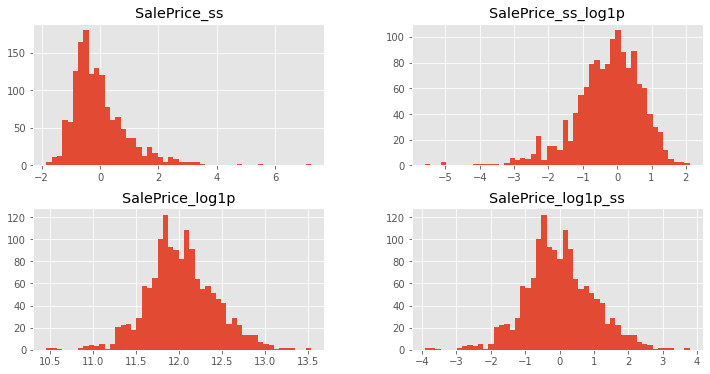

In [86]:
train[["SalePrice_ss", "SalePrice_ss_log1p", 
       "SalePrice_log1p", "SalePrice_log1p_ss"]].hist(figsize=(12, 6), bins=50);

In [111]:
print("왜도(Skewness):", train["SalePrice_log1p"].skew())
print("첨도(Kurtosis):", train["SalePrice_log1p"].kurt())

왜도(Skewness): 0.12134661989685333
첨도(Kurtosis): 0.809519155707878


## 이산화

In [87]:
train["SalePrice_cut"] = pd.cut(train["SalePrice"], bins=4, labels=[1, 2, 3, 4])
train["SalePrice_qcut"] = pd.qcut(train["SalePrice"], q=4, labels=[1, 2, 3, 4])

In [88]:
display(train["SalePrice_cut"].value_counts())
display(train["SalePrice_cut"].value_counts(1))
display(train["SalePrice_qcut"].value_counts())
display(train["SalePrice_qcut"].value_counts(1))

1    1100
2     330
3      25
4       5
Name: SalePrice_cut, dtype: int64

1    0.753425
2    0.226027
3    0.017123
4    0.003425
Name: SalePrice_cut, dtype: float64

2    367
3    366
1    365
4    362
Name: SalePrice_qcut, dtype: int64

2    0.251370
3    0.250685
1    0.250000
4    0.247945
Name: SalePrice_qcut, dtype: float64

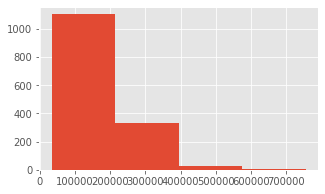

In [89]:
train["SalePrice"].hist(bins=4, figsize=(5, 3))

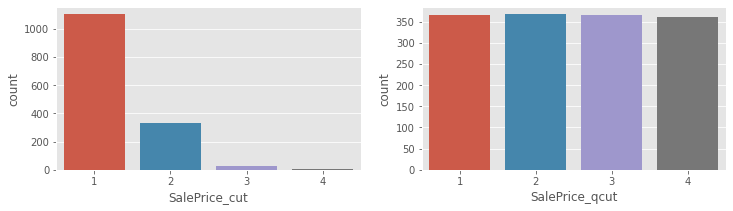

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
sns.countplot(data=train, x="SalePrice_cut", ax=axes[0])
sns.countplot(data=train, x="SalePrice_qcut", ax=axes[1])

## 인코딩

In [91]:
train["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [92]:
# .cat.codes => Ordinal Encoding, 결과가 벡터, 1차원 형태
train["MSZoning"].astype("category").cat.codes

Id
1       3
2       3
3       3
4       3
5       3
       ..
1456    3
1457    3
1458    3
1459    3
1460    3
Length: 1460, dtype: int8

In [93]:
# get_dummies => One-hot-encoding, 결과가 matrix, 2차원 행렬 형태로 나옵니다.
# 순서가 없는 명목형 데이터에 사용합니다. 예를 들어 좋아하는 음료, 주택의 종류, 수업의 종류 등으로 
# 순서가 없거나 크기를 비교할 수 없는 데이터, 범주형 데이터에 사용합니다.
pd.get_dummies(train["MSZoning"])

,C (all),FV,RH,RL,RM
Id,,,,,
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
...,...,...,...,...,...
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


### sklearn을 이용한 인코딩

* https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets
* https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [94]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

In [95]:
train[["MSZoning_enc"]] = oe.fit_transform(train[["MSZoning"]])
print(oe.categories_)
train[["MSZoning", "MSZoning_enc"]].sample(3)

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object)]


,MSZoning,MSZoning_enc
Id,,
323,RL,3.0
766,RL,3.0
76,RM,4.0


In [96]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")
train_ohe = ohe.fit_transform(train[["MSZoning", "Neighborhood"]]).toarray()
test_ohe= ohe.transform(test[["MSZoning", "Neighborhood"]])
print(train_ohe.shape, test_ohe.shape)
pd.DataFrame(train_ohe, columns=ohe.get_feature_names_out())

(1460, 30) (1459, 30)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
# 꼭 원핫인코딩 했을 때는 train, test 피처의 수가 같은지 확인해 주세요!
print(train_ohe.shape, test_ohe.shape)

(1460, 30) (1459, 30)


## 다항식 전개

In [98]:
train.select_dtypes(include=np.number).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   LotFrontage         1201 non-null   float64
 2   LotArea             1460 non-null   int64  
 3   OverallQual         1460 non-null   int64  
 4   OverallCond         1460 non-null   int64  
 5   YearBuilt           1460 non-null   int64  
 6   YearRemodAdd        1460 non-null   int64  
 7   MasVnrArea          1452 non-null   float64
 8   BsmtFinSF1          1460 non-null   int64  
 9   BsmtFinSF2          1460 non-null   int64  
 10  BsmtUnfSF           1460 non-null   int64  
 11  TotalBsmtSF         1460 non-null   int64  
 12  1stFlrSF            1460 non-null   int64  
 13  2ndFlrSF            1460 non-null   int64  
 14  LowQualFinSF        1460 non-null   int64  
 15  GrLivArea           1460 non-null   int64  
 16  BsmtFu

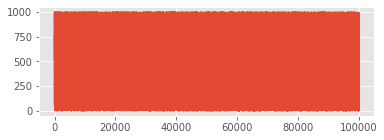

In [99]:
s_uniform = pd.Series(np.random.uniform(0, 1000, 100000))
s_uniform.plot(figsize=(6, 2))

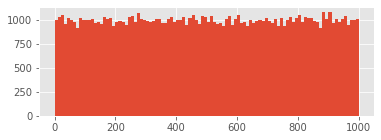

In [100]:
s_uniform.hist(bins=100, figsize=(6, 2));

In [103]:
# 히스토그램을 그렸을 때 어딘가는 많고 적은 데이터가 있다면 그것도 특징이 될 수 있는데
# 특징이 잘 구분되지 않는다면 power transform 등을 통해 값을 제곱을 해주거나 하면 특징이 좀 더 구분되어 보이기도 합니다.
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

house_poly = poly.fit_transform(train[["MSSubClass", "LotArea"]])
pd.DataFrame(house_poly, columns=poly.get_feature_names_out())

,1,MSSubClass,LotArea,MSSubClass^2,MSSubClass LotArea,LotArea^2
0,1.0,60.0,8450.0,3600.0,507000.0,71402500.0
1,1.0,20.0,9600.0,400.0,192000.0,92160000.0
2,1.0,60.0,11250.0,3600.0,675000.0,126562500.0
3,1.0,70.0,9550.0,4900.0,668500.0,91202500.0
4,1.0,60.0,14260.0,3600.0,855600.0,203347600.0
...,...,...,...,...,...,...
1455,1.0,60.0,7917.0,3600.0,475020.0,62678889.0
1456,1.0,20.0,13175.0,400.0,263500.0,173580625.0
1457,1.0,70.0,9042.0,4900.0,632940.0,81757764.0
1458,1.0,20.0,9717.0,400.0,194340.0,94420089.0


##파생변수

In [106]:
train["TotalSF"] = train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"]
test["TotalSF"] = test["TotalBsmtSF"] + test["1stFlrSF"] + test["2ndFlrSF"]